# Introducing Scikit-Learn

<a href="http://scikit-learn.org">Scikit-Learn</a>
- package that provides efficient versions of a large number of common machine learning algorithms
- easy to use and complete online documentation
    - once you understand the basic use and syntax of Scikit-Learn for one type of model, switching to a new model or algorithm is very straightforward

## Data Representation in Scikit-Learn

### Data as table

- a two-dimensional grid of data
    - Rows represent individual samples (trials) of the data set
    - Columns represent the features related to each of these elements

### Example: [PPG-DaLiA dataset](https://archive.ics.uci.edu/ml/datasets/PPG-DaLiA)
- Data from 15 subjects wearing physiological and motion sensors, performing several activites
- In this example we consider data from the accelerometer placed on chest of one subject (fs = 64)
- The data is segmented in the different trials using a window of 4 seconds with 50% overlap
#### Features
    - The extracted features are `mean`, `std`, `FFT peak` in [2, 32] Hz and `corresponding frequency` of the three (x, y, z) acceleration signals, for a total of **12** features

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123) # To have reproducible results for different runs

file_path = # insert path of the data file
data = np.load(file_path)
data.shape

(3535, 13)

The variable `data` is a Numpy array containing the trials, corresponding features and class. We will now transform it in a Pandas `DataFrame`, a Python structure which allows for better data visualization and manipulation

In [2]:
import pandas as pd

columns = ["mean_x", "mean_y", "mean_z", "std_x", "std_y", "std_z", "max_fft_x", 
           "max_fft_y", "max_fft_z", "max_f_x", "max_f_y", "max_f_z", "class"]

# from Numpy array to Pandas DataFrame
df = pd.DataFrame(data, columns = columns)

# from line 7 to 12 not important
dic_activities = {0: "Sitting", 1: "Stairs", 2: "Soccer", 3: "Cycling", 
                4: "Driving", 5: "Lunch", 6: "Walking", 7: "Working"}

for k, v in dic_activities.items(): 
    df['class'][df['class']==k] = v

# randomly shuffle the rows
df = df.sample(frac=1).reset_index(drop=True)

# print the first 10 samples    
df.head(5) 

,mean_x,mean_y,mean_z,std_x,std_y,std_z,max_fft_x,max_fft_y,max_fft_z,max_f_x,max_f_y,max_f_z,class
0,0.689635,-0.042896,0.622204,0.078845,0.104441,0.089258,2.864817,4.011435,2.277809,2.00,4.75,10.00,Soccer
1,0.908557,-0.018004,-0.009580,0.274077,0.166705,0.178814,21.899608,25.124435,12.361270,2.00,2.75,3.75,Walking
2,0.884942,-0.064324,-0.274925,0.003762,0.004581,0.006752,0.220923,0.162694,0.231396,6.75,5.50,3.00,Working
3,0.758797,0.054541,-0.543713,0.047410,0.019616,0.029572,2.301234,1.033814,1.216232,9.75,2.75,3.50,Driving
4,0.918354,-0.035795,-0.044278,0.233302,0.144866,0.163810,32.450465,18.754908,18.225935,2.00,3.00,2.00,Lunch


- each row refers to a single sample/trial

- each column refers to a feature that describes each sample, except for the last column
    - the last column is the label of the class of each sample

### Data exploration
It makes sense, before training any machine learning model, to explore the data we have (Exploratory Data Analysis - EDA). To begin, let's look at how many samples we have for each class

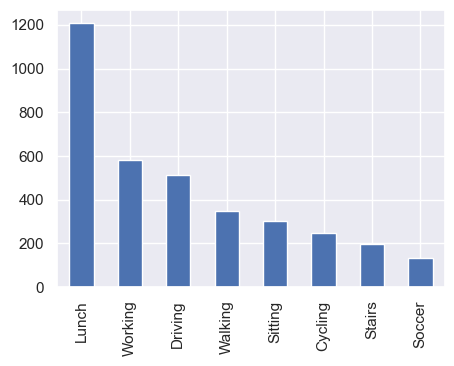

In [49]:
plt.figure(figsize = (5,3.6))
df['class'].value_counts().plot(kind = 'bar');  

#### Seaborn
`Seaborn` is a Python library that provides a high-level interface for drawing attractive and informative statistical graphics. Here we use the function `pairplot` to visualize the relationship among different features of the data, and how they vary according to each class

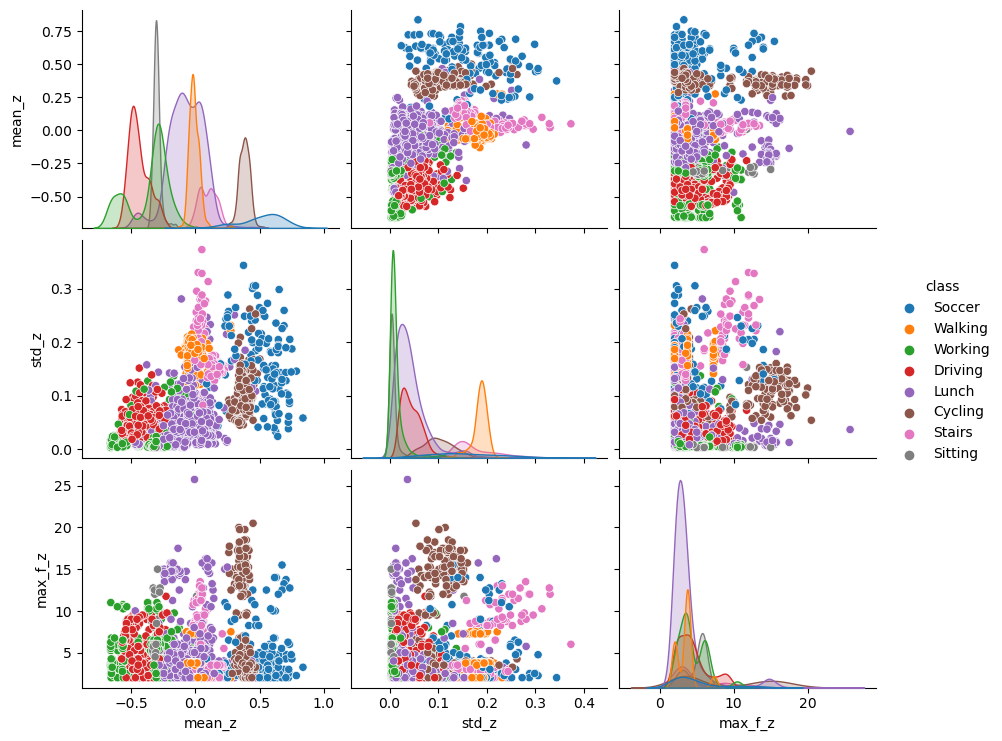

In [3]:
%matplotlib inline
import seaborn as sns

sns.pairplot(df, hue='class', vars = ['mean_z', 'std_z', 'max_f_z'], aspect = 1.2); # you can explore other features by specifying them in the parameter "vars"

#### Feature matrix

The part of the data matrix containing the features

Usually in *scikit-learn* documentation referred as ``X``

Can be a:
- Two-dimensional Numpy array 
- Pandas ``DataFrame``

In [4]:
X = df.drop('class', axis = 1) # drop the last column of df
n_samples, n_features = X.shape

#### Label array

*label* or *target* array, by convention usually called ``y``
- usually one dimensional 
- generally contained in a NumPy array or Pandas ``Series`` (one-dimensional version of a ``DataFrame``).
- may have continuous numerical values, or discrete classes/labels (as in our case)
- usually it is the quantity we want to *predict* from the data
    - in statistical terms, it is the dependent variable

In [5]:
y = df['class'] # select the last column of df
n_classes = len((y.unique())) # number of classes

## Scikit-Learn Basics

Most commonly, the steps in using the Scikit-Learn estimator API are as follows

1. Choose a model by importing the appropriate estimator class from Scikit-Learn.
2. Choose model _hyperparameters_<sup>1 </sup> by instantiating the estimator class with desired values (or in the first attempt use the default values)
3. Arrange data into a features matrix and target vector following the discussion above.
4. Fit the model to your data by calling the ``fit()`` method of the model instance.
5. Apply the Model to new data:
   - For supervised learning, usually we predict labels of test data using the ``predict()`` method.
   
<sup>1 </sup> *hyperparameters* are parameters of the model that cannot be directly learned from the data during training, and must be chosen _before_ the learning process. Example: one of the hyperparameters of a Decision Tree is `max_depth`, which we will encounter later

### 1. Simple training and testing (holdout method)

For this task, we will use the _Decision Tree_ algorithm, with the standard parameter values.
We would like to evaluate the model on data it has not seen before, and so we will split the data into a *training set* and a *testing set*.
This can be done by hand, but it is more convenient to use the ``train_test_split`` utility function

In [6]:
from sklearn.model_selection import train_test_split

random_state = 42

# 70% train and 30% test
'''the parameter "stratify" ensure that, after the split, each set contains approximately 
the same percentage of samples of each class as the original set'''
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state, 
                                                    train_size = 0.7, stratify = y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2474, 12) (1061, 12) (2474,) (1061,)


With the data arranged, we can follow the following steps
1. choose the model class, it will be `DecisionTreeClassifier`, imported from `sklearn.tree`<br>
2. instantiate the `model` as a `DecisionTreeClassifier` whithout any hyperparameter, we will use the defaults<br>
3. fit the `model` to data, calling its method `fit` with parameters `Xtrain, ytrain`<br>
4. predict the target `y_pred_train` using the `predict` method of `model` on the `Xtrain` data

In [7]:
from sklearn.tree import DecisionTreeClassifier            # 1. choose model class

model = DecisionTreeClassifier(random_state=random_state)  # 2. instantiate model with default hyperprameters
model.fit(X_train, y_train)                                # 3. fit model to data (model training)
y_pred_train = model.predict(X_train)                      # 4. predict on training data

We can use the ``accuracy_score`` utility function to see the fraction of predicted training set labels that match their true value.

In [8]:
from sklearn.metrics import accuracy_score

accuracy_train = accuracy_score(y_train, y_pred_train)
print("The accuracy on training set is {0:.2f}%".format(accuracy_train * 100))

The accuracy on training set is 100.00%


Finally, predict the new target `y_pred_test` using the `predict` method of `model` on the `X_test` data, then compute the accuracy on the test set. This tells us the **performance** of our model.

In [9]:
y_pred_test = model.predict(X_test)                  # 4. predict on new data
accuracy_test = accuracy_score(y_test, y_pred_test)
print("The accuracy on test set is {0:.2f}%".format(accuracy_test * 100))

The accuracy on test set is 92.27%


### 2. Train, validation and test
Here we use a three way splitting: `train, validation, test`. For simplicity, since we already splitted in _train_ and _test_, we will furtherly split the _train_ into two parts: `train_t` and `val` <br>
Then we can use the validation set to find the best value of the hyperparameter `max_depth` of the DecisionTree<br>
    - the experiment is repeated varying `max_depth` from 1 to the depth of the tree fitted on the `train_t` set <br>
    - the accuracy scores for the various values of `max_depth` are collected and plotted <br>
    - the best value is the one who gives the best accuracy 

In [10]:
X_train_t, X_val, y_train_t, y_val = train_test_split(X_train, 
                                                      y_train, 
                                                      random_state = random_state,
                                                      train_size = 0.7,
                                                      stratify = y_train) 
print("There are {} samples in the train_t dataset".format(X_train_t.shape[0]))
print("There are {} samples in the val dataset".format(X_val.shape[0]))

There are 1731 samples in the train_t dataset
There are 743 samples in the val dataset


In [11]:
model = DecisionTreeClassifier(random_state = random_state)
model.fit(X_train_t, y_train_t)
fitted_max_depth = model.tree_.max_depth # max_depth of the tree fitted on the training set
parameter_values = np.arange(1,fitted_max_depth+1) 
parameter_values

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [12]:
scores = []
for par in parameter_values: 
    estimator = DecisionTreeClassifier(max_depth = par,
                                       random_state = random_state)
    estimator.fit(X_train_t, y_train_t)
    y_pred_val = estimator.predict(X_val)
    score =  accuracy_score(y_val, y_pred_val) * 100 
    scores.append(score)

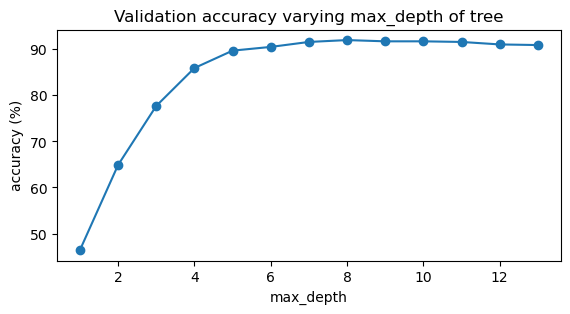

In [13]:
plt.figure(figsize = (6.5, 3))
plt.plot(parameter_values, scores, '-o')
plt.xlabel('max_depth')
plt.ylabel('accuracy (%)')

plt.title("Validation accuracy varying max_depth of tree")
plt.show();

In [14]:
top_par = parameter_values[np.argmax(scores)]
print("Validation: The best accuracy is obtained with MAX_DEPTH={}".format(top_par))

Validation: The best accuracy is obtained with MAX_DEPTH=8


### K-Fold Cross Validation
The original dataset `X` is split into k non-overlapping subsets (usually k=5 or k=10). Then, model training and validation are executed k times, each time training on k-1 subsets and validating on a different subset. The final score is the average score across subsets. This method is usually preferred to evaluate the performance of the model as it has a lower _bias_ than the prevoius two.

In [23]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# For this part it is convenient to have X and y as numpy arrays instead of pandas objects
X_train = np.array(X_train)
y_train = np.array(y_train)
scores = []
fold = 0

kf = StratifiedKFold(5, shuffle=True, random_state=random_state)

for train_t, val in kf.split(X_train,y_train):  
    fold += 1
    X_train_t = X_train[train_t]
    y_train_t = y_train[train_t]
    X_val = X_train[val]
    y_val = y_train[val]

    estimator = DecisionTreeClassifier(random_state=random_state)
    estimator.fit(X_train_t, y_train_t)
    y_pred_val = estimator.predict(X_val)
    score =  accuracy_score(y_val, y_pred_val) * 100 
    print("Score of fold %d: %.2f%%" % (fold, score))
    scores.append(score)
print('Average score: %.2f%%' % (np.mean(scores)))

Score of fold 1: 88.08%
Score of fold 2: 90.71%
Score of fold 3: 91.31%
Score of fold 4: 92.32%
Score of fold 5: 87.65%
Average score: 90.02%


Now we can repeat the search for the optimal hyperparameter `max_depth`, but using as metric the average accuracy across folds

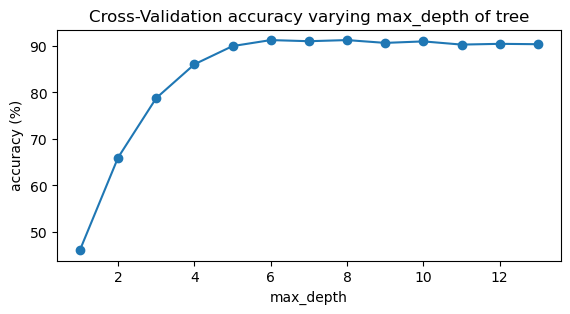

In [17]:
avg_scores = []

kf = StratifiedKFold(5, shuffle=True, random_state=random_state)

for par in parameter_values:
    
    scores = []
    for train_t, val in kf.split(X_train,y_train):  
        fold += 1
        X_train_t = X_train[train_t]
        y_train_t = y_train[train_t]
        X_val = X_train[val]
        y_val = y_train[val]

        estimator = DecisionTreeClassifier(max_depth = par,
                                           random_state=random_state)
        estimator.fit(X_train_t, y_train_t)
        y_pred_val = estimator.predict(X_val)
        score =  accuracy_score(y_val, y_pred_val) * 100 
        scores.append(score)
        
    avg_scores.append(np.mean(scores))

plt.figure(figsize = (6.5, 3))
plt.plot(parameter_values, avg_scores, '-o')
plt.xlabel('max_depth')
plt.ylabel('accuracy (%)')

plt.title("Cross-Validation accuracy varying max_depth of tree")
plt.show();

Now we can use the best `max_depth` obtained with cross-validation to fit the tree and estimate the performance on the test set (This is what we care about!)

In [38]:
top_par = parameter_values[np.argmax(avg_scores)]
estimator = DecisionTreeClassifier(max_depth = top_par, random_state=random_state)
estimator.fit(pd.DataFrame(X_train), pd.DataFrame(y_train))
y_pred = estimator.predict(np.array(X_test))
accuracy_cv = accuracy_score(np.array(y_test), y_pred) * 100
print("The accuracy on test set tuned with cross_validation is {:.1f}% with depth {}".format(accuracy_cv, top_par))

The accuracy on test set tuned with cross_validation is 93.0% with depth 8


### Confusion Matrix

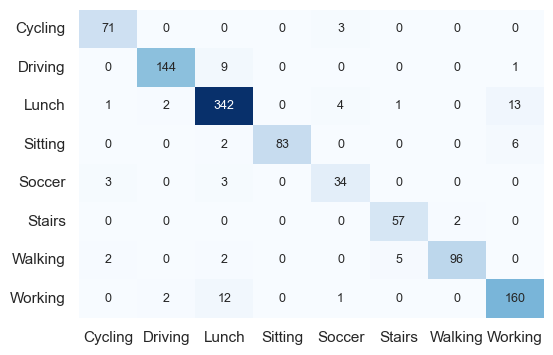

In [65]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

list_activities = sorted(y_test.unique())

df_cm = pd.DataFrame(cm.astype('int'), index = [i for i in list_activities],
                  columns = [i for i in list_activities])
plt.figure(figsize = (6,4))
sns.set(font_scale=1)
sns.heatmap(df_cm, annot=True, annot_kws={"size": 9}, fmt='g', cmap = 'Blues', cbar = False);

We can finally show more detailed information about model performance using the `classification_report` function of `sklearn.metrics`, using the true and predicted target values

In [24]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Cycling       0.92      0.96      0.94        74
     Driving       0.97      0.94      0.95       154
       Lunch       0.92      0.94      0.93       363
     Sitting       1.00      0.91      0.95        91
      Soccer       0.81      0.85      0.83        40
      Stairs       0.90      0.97      0.93        59
     Walking       0.98      0.91      0.95       105
     Working       0.89      0.91      0.90       175

    accuracy                           0.93      1061
   macro avg       0.93      0.92      0.92      1061
weighted avg       0.93      0.93      0.93      1061



Support is the number of samples belonging to each class